# Palmer Penguins EDA

[SOURCE](https://github.com/allisonhorst/palmerpenguins)

![Artwork by @allison_horst](./imgs/lter_penguins.png)
Artwork by @allison_horst

- The goal of **palmerpenguins** is to provide a great dataset for **data exploration & visualization**, as an alternative to `iris`.

- Data were collected and made available by _Dr. Kristen Gorman_ and the _Palmer Station, Antarctica LTER_, a member of the _Long Term Ecological Research Network_.

## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

plt.style.use('fivethirtyeight')
# sns.set_style("whitegrid"); # alternate style for plots

In [2]:
df = pd.read_csv('./data/penguins.csv')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female


In [5]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### Features/Columns
- `species`: Penguin species (Chinstrap, Gentoo or Adélie) 
- `island` : Island name (Biscoe, Dream, or Torgersen) in the Palmer Archipelago (Antarctica)
- `bill_length_mm` : Upper ridge of beak's length  
- `bill_depth_mm` : Upper ridge of beak's depth
- `flipper_length_mm` : Flipper(wing) length in mm  
- `body_mass_g` : Body mass
- `sex`: Penguin Sex

> `Bill` Upper ridge of the beak
> ![Bill or Culmen (Artwork by @allison_horst)](./imgs/culmen_depth.png)
> Artwork by @allison_horst

## Understanding the Data

In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [9]:
print("Covariance")
df.cov()

Covariance


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [10]:
print("correlation")
df.corr()

correlation


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


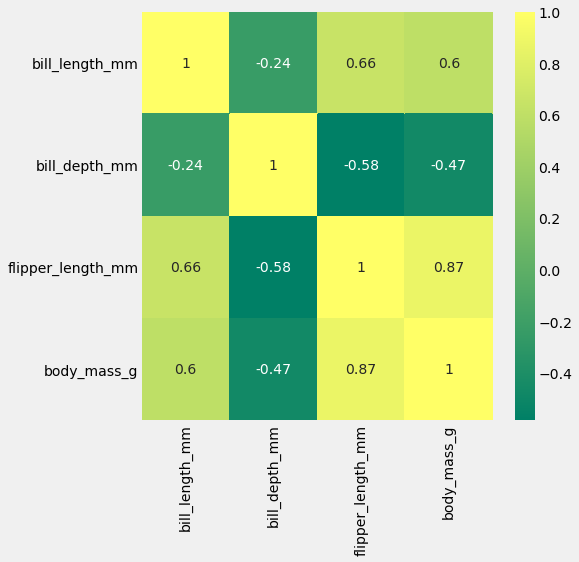

In [11]:
def corr_heatmap(data_frame):
    plt.figure(figsize=(7,7))
    cor = data_frame.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.summer)
    plt.show()
    
corr_heatmap(df)

### Handling Missing Values

In [12]:
missing_values = df.isnull().sum()
missing_values_percentage = missing_values / len(df) * 100

missing_values_df = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_df = missing_values_df.rename(columns={0: 'Missing Values', 1: 'Missing values %'})
missing_values_df[missing_values_df.iloc[:, 1] != 0].sort_values('Missing values %', ascending=False).round(2)

,Missing Values,Missing values %
sex,11,3.20
bill_length_mm,2,0.58
bill_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58


In [13]:
imputer = SimpleImputer(strategy='most_frequent') 
df.iloc[:,:] = imputer.fit_transform(df)

In [14]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## EDA

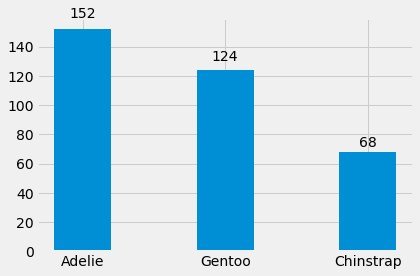

In [15]:
fig, ax = plt.subplots()

bars = ax.bar(df['species'].unique(), df['species'].value_counts(), width=0.4)# , color='#003f5c', edgecolor='w')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
                str(height), ha='center')    
plt.show()

Imbalanced dataset since all three species have different number of samples.

NOTE: Balanced datasets: The number of samples for each label are equal

### Pair-plot

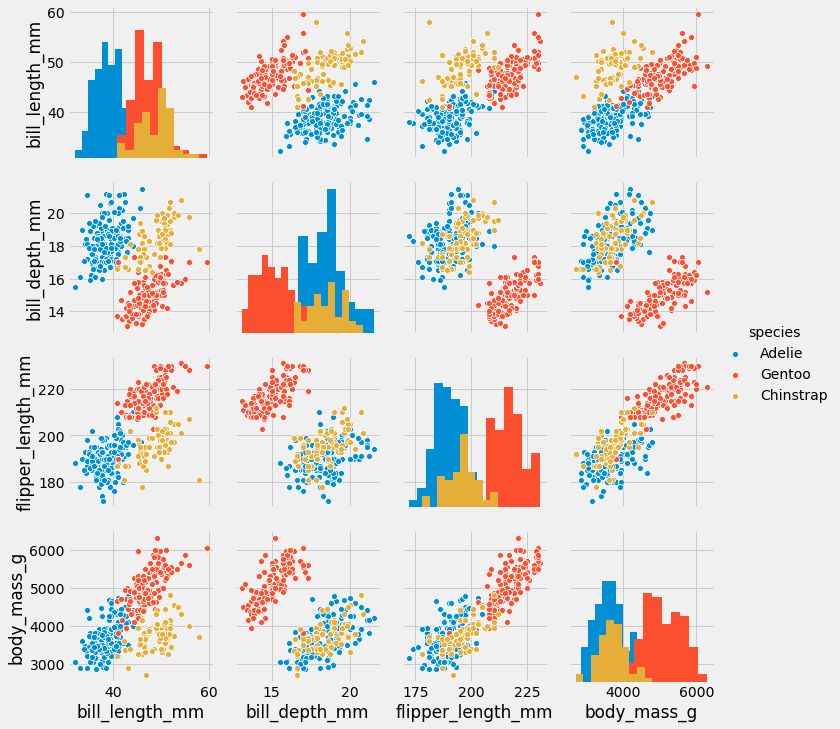

In [16]:
sns.pairplot(df, hue='species', diag_kind='hist')

- **Gentoo** are linearly seperable via `if-else`
    - using `bill_depth` and `body_mass` 
    - using `bill_depth` and `flipper_length`
- All three species are almost linearly seperable
    - using `flipper_length` and `bill_length`
    - using `bill_depth` and `bill_length`

### Box-plot

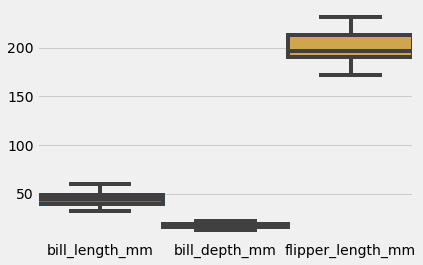

In [17]:
df1 = df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=1)
plt.show()

### Uni-Variate Analysis (KDE, PDF, CDF)

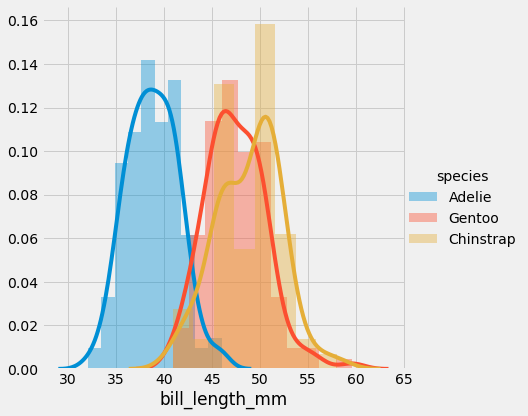

In [18]:
sns.FacetGrid(df, hue="species", height=6).map(
    sns.distplot, "bill_length_mm").add_legend()
plt.show()

- **Adelie** has less overlap on `bill_length_mm` PDF (KDE)

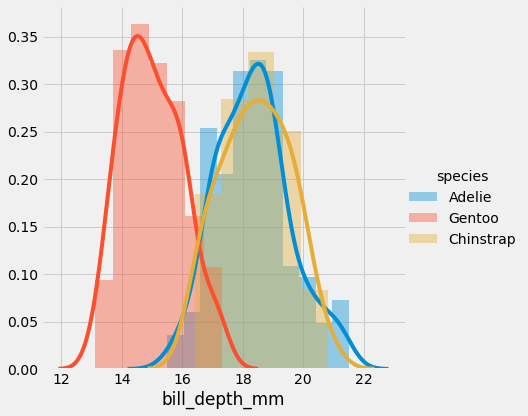

In [19]:
sns.FacetGrid(df, hue="species", height=6).map(
    sns.distplot, "bill_depth_mm").add_legend()
plt.show()

- **Gentoo** has less overlap on `bill_depth_mm` PDF (KDE)

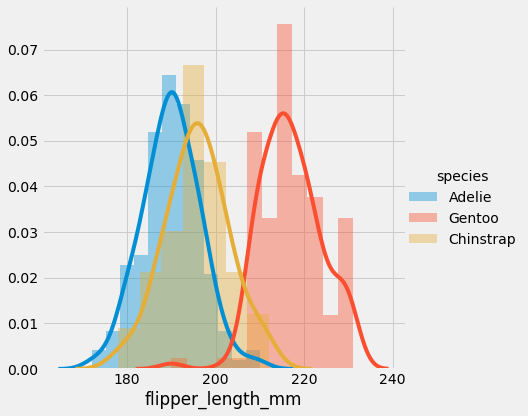

In [20]:
sns.FacetGrid(df, hue="species", height=6).map(
    sns.distplot, "flipper_length_mm").add_legend()
plt.show()

- **Gentoo** has less overlap on `flipper_length_mm` PDF (KDE)

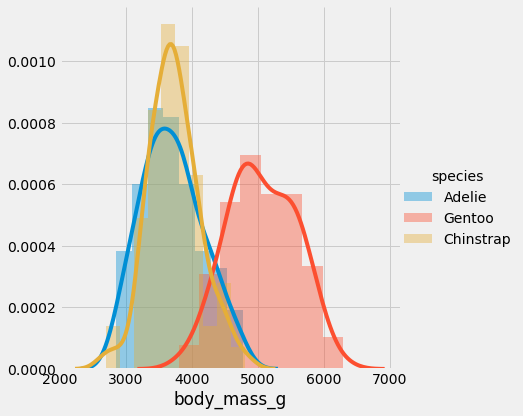

In [21]:
sns.FacetGrid(df, hue="species", height=6).map(
    sns.distplot, "body_mass_g").add_legend()
plt.show()

- **Gentoo** has less overlap on `body_mass_g` PDF (KDE)

In [22]:
def plot_cdf_pdf(df, feature, label=""):
    counts, bin_edges = np.histogram(df[feature], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    #     label = df[label].unique()[0]
    plt.plot(bin_edges[1:],pdf, label=label+' PDF')
    plt.plot(bin_edges[1:], cdf, label=label+' CDF')
    plt.title(f"PDF, CDF of {feature}")
    plt.legend()
    
# plot_cdf_pdf(adelie, 'flipper_length_mm', 'species')

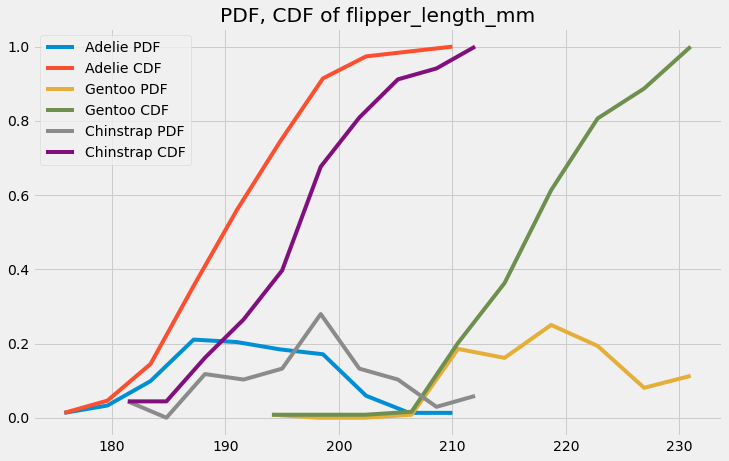

In [23]:
plt.figure(figsize=(11,7))
for i in df['species'].unique():
    plot_cdf_pdf(df.loc[df['species'] == i], 'flipper_length_mm', i)

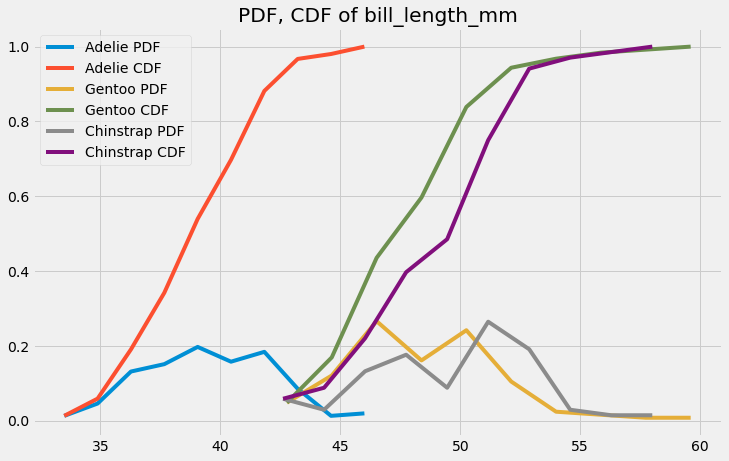

In [24]:
plt.figure(figsize=(11,7))
for i in df['species'].unique():
    plot_cdf_pdf(df.loc[df['species'] == i], 'bill_length_mm', i)

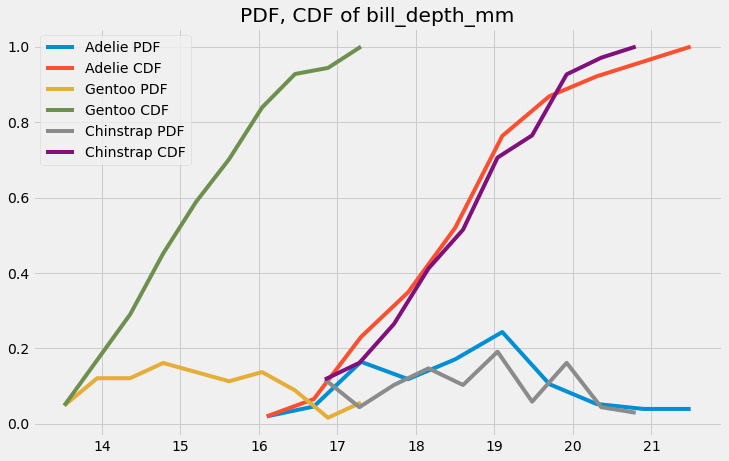

In [25]:
plt.figure(figsize=(11,7))
for i in df['species'].unique():
    plot_cdf_pdf(df.loc[df['species'] == i], 'bill_depth_mm', i)

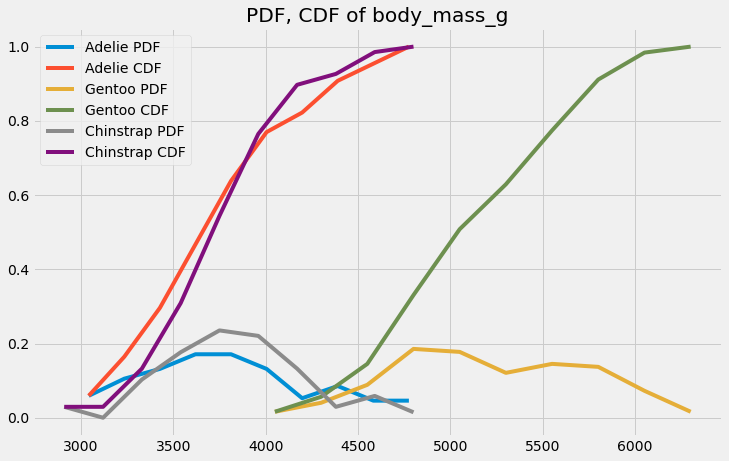

In [26]:
plt.figure(figsize=(11,7))
for i in df['species'].unique():
    plot_cdf_pdf(df.loc[df['species'] == i], 'body_mass_g', i)

### Bi-Variate analysis

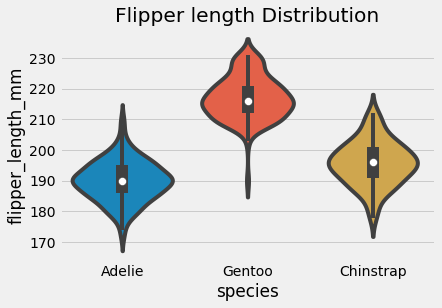

In [27]:
sns.violinplot(x="species", y='flipper_length_mm', data=df, size=8)
plt.title("Flipper length Distribution")
plt.show()

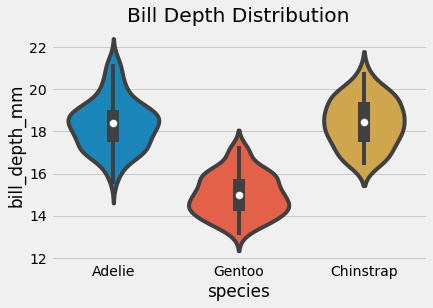

In [28]:
sns.violinplot(x="species", y='bill_depth_mm', data=df, size=8)
plt.title('Bill Depth Distribution')
plt.show()

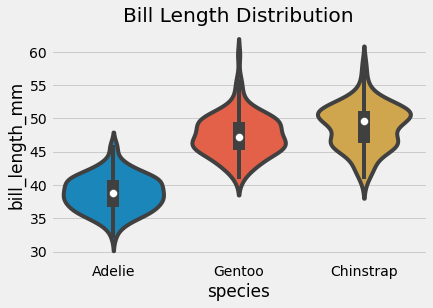

In [29]:
sns.violinplot(x="species", y='bill_length_mm', data=df, size=8)
plt.title('Bill Length Distribution')
plt.show()

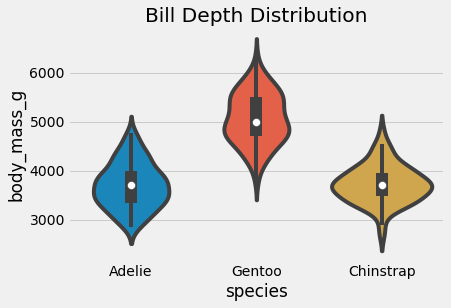

In [30]:
sns.violinplot(x="species", y='body_mass_g', data=df, size=8)
plt.title('Bill Depth Distribution')
plt.show()

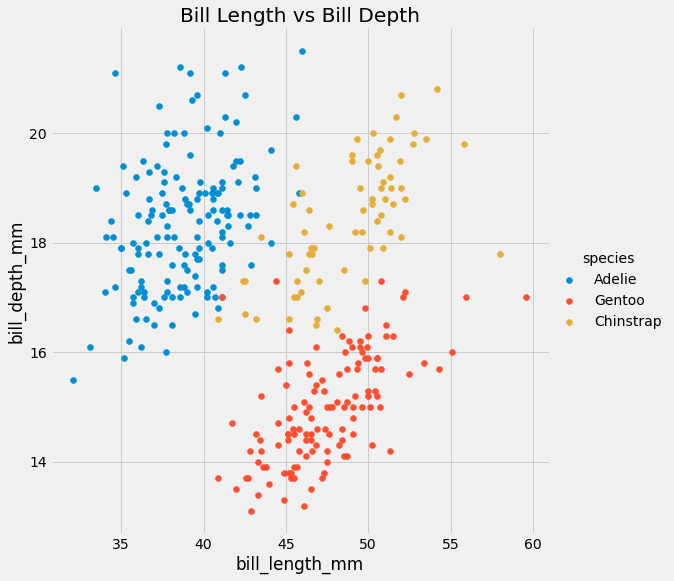

In [31]:
sns.FacetGrid(df, hue="species", height=8).map(
    plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()
plt.title('Bill Length vs Bill Depth')
plt.show()

All three species are almost linearly seperable (have minor overlap) from eachother using `bill_depth_mm` and `bill_length_mm`

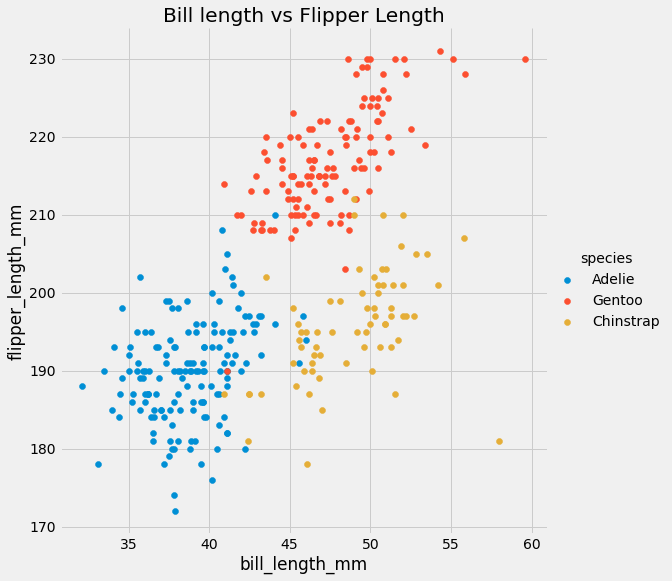

In [32]:
sns.FacetGrid(df, hue="species", height=8).map(
    plt.scatter, "bill_length_mm", "flipper_length_mm").add_legend()
plt.title("Bill length vs Flipper Length")
plt.show()

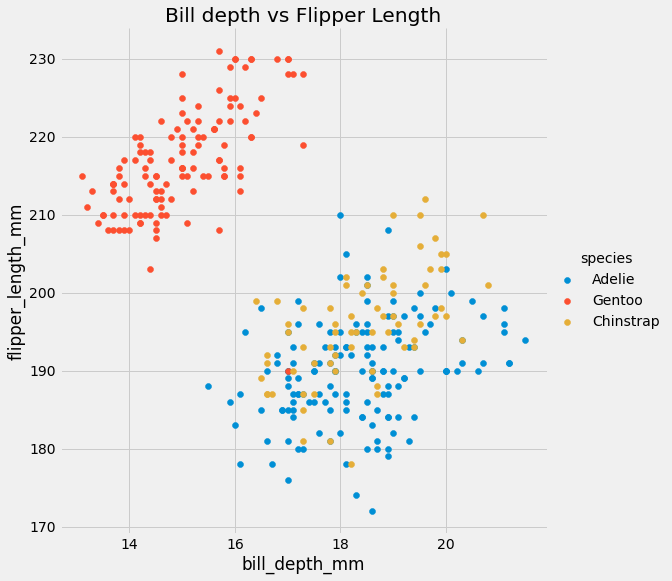

In [33]:
sns.FacetGrid(df, hue="species", height=8).map(
    plt.scatter, "bill_depth_mm", "flipper_length_mm").add_legend()
plt.title("Bill depth vs Flipper Length")
plt.show()

- Gentoo is linearly seperable using if else statements

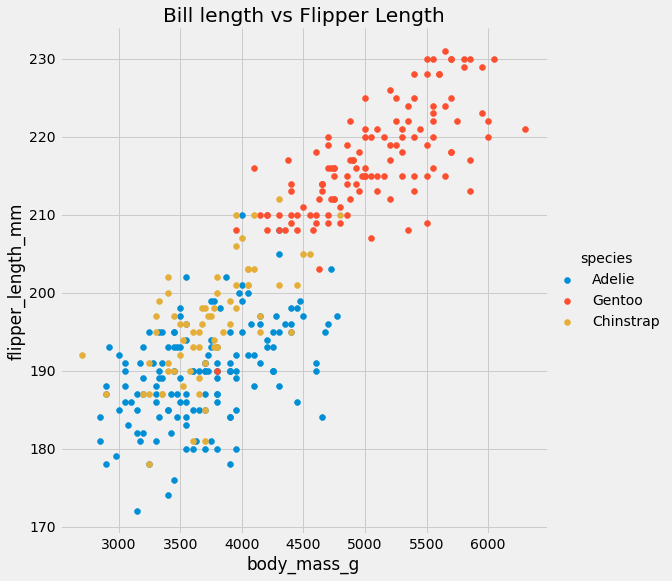

In [34]:
sns.FacetGrid(df, hue="species", height=8).map(
    plt.scatter, "body_mass_g", "flipper_length_mm").add_legend()
plt.title("Bill length vs Flipper Length")
plt.show()

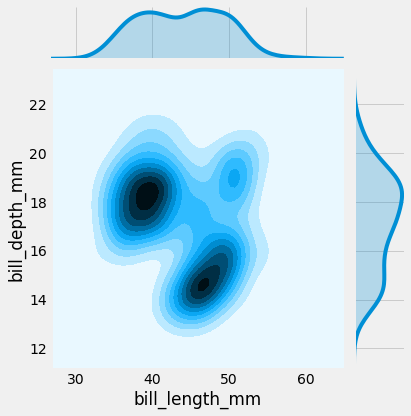

In [35]:
# # contours
# # For single species
# sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=df.loc[df['species']=='Gentoo'], kind="kde")
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=df, kind="kde")
plt.show()